In [12]:
# LOADING LIBRARIES AND DATA FILE

import pandas as pd
import matplotlib as plt
import seaborn as sns 
import os
import plotly.express as px

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Enter the directory loaction of the file
os.getcwd()
os.chdir('C:\\Users\\skatar6\\Downloads')

# Read the file
heart_file = pd.read_csv("heart.csv")
heart_file.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# DATA PRE-PROCESSING

# All values are numeric, no conversion needed
# Lookout for null values 

heart_file.isna().sum()

# There are no null values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [29]:
print("Output types are" , heart_file.output.unique())
# The output is in binary terms, 0 and 1, so no change needed


Output types are [1 0]
Chest pain types are [3 2 1 0]


In [11]:
# DATA EXPLORATION AND VISUALISATIONS
# Describe the data

heart_file.describe().round()

# Thus our dataset looks at people within the age group of 29-77 years

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,150.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,0.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,134.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,274.0,0.0,1.0,166.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


<AxesSubplot:xlabel='age', ylabel='output'>

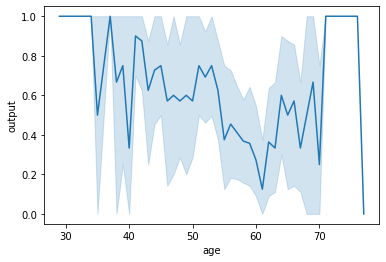

In [22]:
# Studying the correlations between variables
sns.lineplot(x= heart_file["age"], y= heart_file["output"])

# This shows a varying relation between age and chances of heart disease. The chances of getting heart disease is more between the age of 50 and 70 

<AxesSubplot:title={'center':'Correlation between Age and patients with heart disease '}, xlabel='age'>

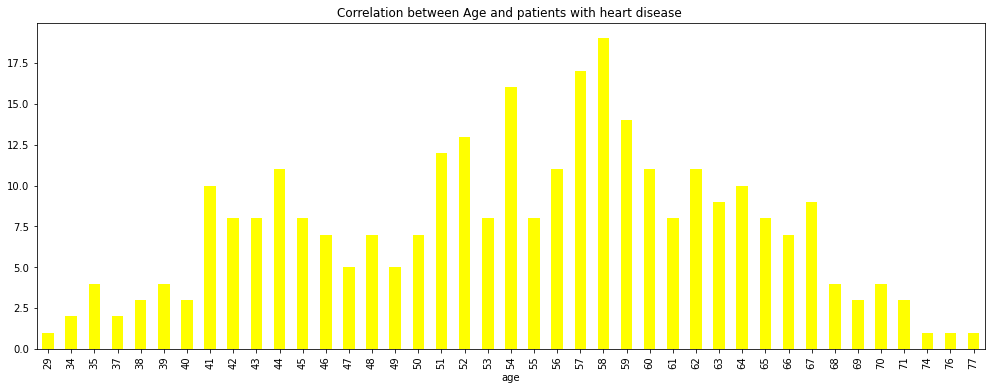

In [31]:
# Count of people with heart disease in different age groups
heart_file.groupby('age')["output"].count().plot(kind="bar",figsize=(17,6), color="yellow", title="Correlation between Age and patients with heart disease ")

#Observation: People with age between 51 and 64 have higher chances of heart problems

<AxesSubplot:title={'center':'Male & Female who have heart disease'}, ylabel='output'>

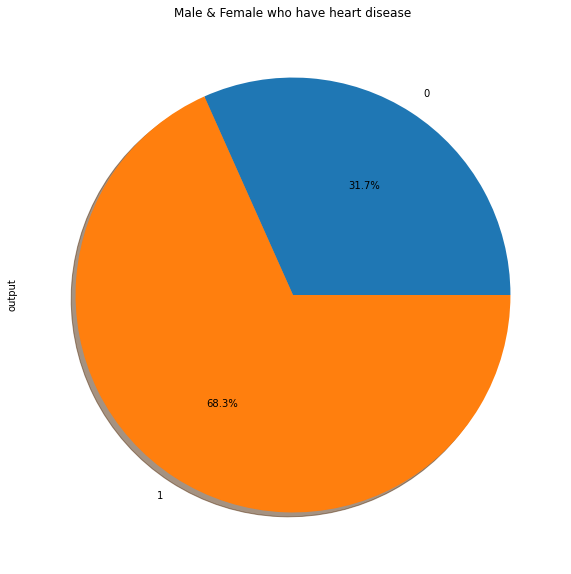

In [26]:
# Grouping of sex category and read the correlation between sex and chances of heart disease

heart_file.groupby('sex')["output"].count().plot(kind="pie", autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Male & Female who have heart disease")

# We get a result that: 
# 1: Male: 68.3% people who get heart disease are male
# 0: Female: 31.7% people who get heart disease are female
# Gender is an influential variable

<AxesSubplot:title={'center':'Chest Pain type'}, ylabel='output'>

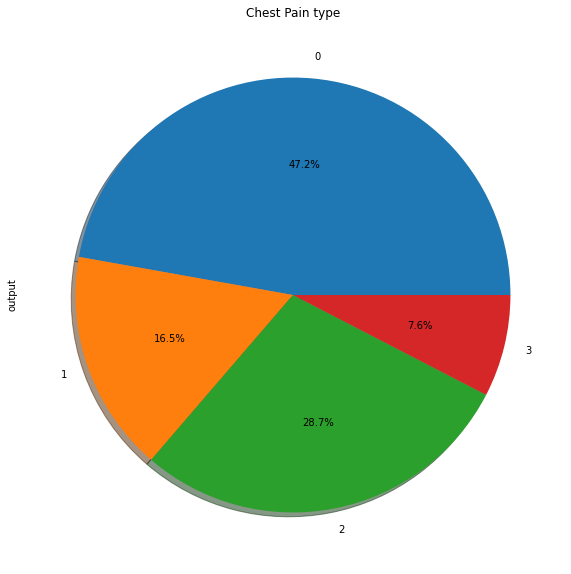

In [27]:
# Study the correlation between chest pain type when having a heart disease

heart_file.groupby('cp')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Chest Pain type")

# Results: 
# 0 : asymptomatic 47.2%
# 1 : typical angina 16.5%
# 2 : atypical angina 28.7 %
# 3 : non-anginal pain 7.6 %

# It is an influential variable

<AxesSubplot:title={'center':'fasting blood sugar'}, ylabel='output'>

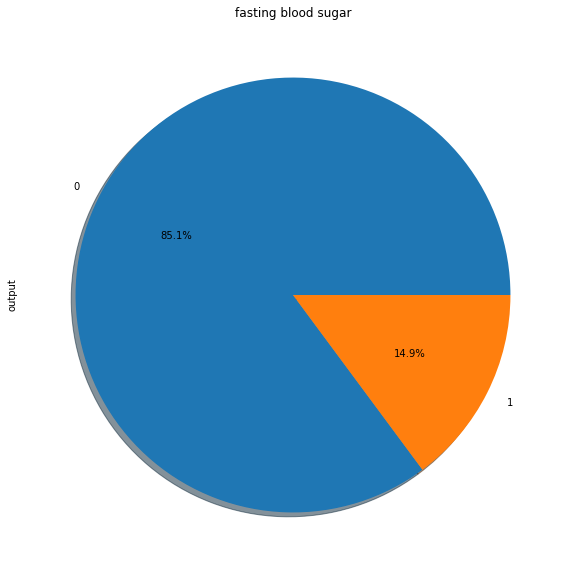

In [4]:
# Study the correlation between fasting blood sugar when having a heart disease

heart_file.groupby('fbs')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="fasting blood sugar")

# It is indeed an influential variable for predictive modelling
# 14.9% have fasting blood sugar > 120 mg/dl
# 85.1% have fasting blood sugar <= 120 mg/dl

<AxesSubplot:title={'center':'fasting blood sugar'}, ylabel='output'>

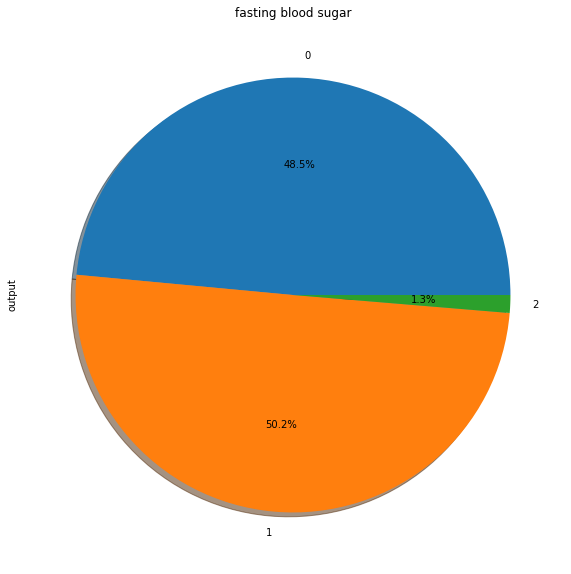

In [9]:
# Study the correlation between rest electrocardiographic results when having a heart disease

heart_file.groupby('restecg')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="fasting blood sugar")


<AxesSubplot:xlabel='restecg', ylabel='output'>

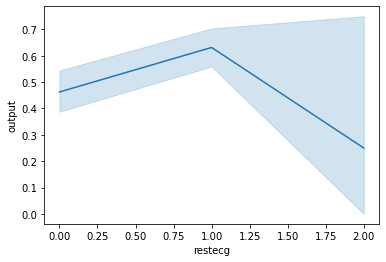

In [8]:
sns.lineplot(x = heart_file['restecg'], y = heart_file['output'])

#There is not much variation caused by ecg results

<AxesSubplot:title={'center':'resting blood pressure'}, ylabel='output'>

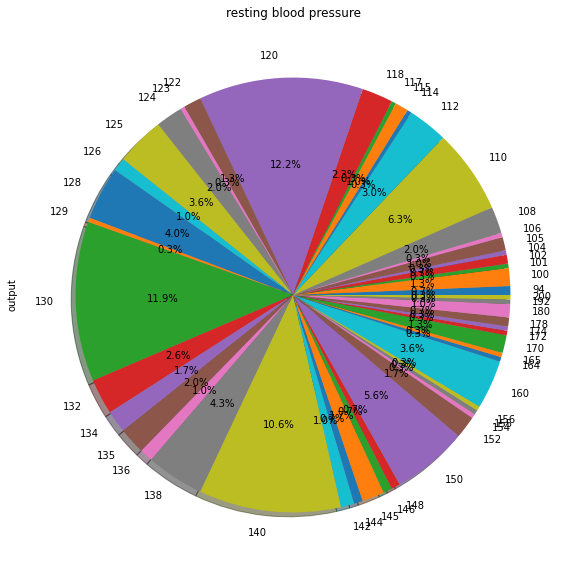

In [23]:
# Study the correlation between resting blood pressure when having a heart disease

heart_file.groupby('trtbps')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="resting blood pressure")

# This variable does not tell much about the probability of the target variable

<AxesSubplot:xlabel='thalachh', ylabel='output'>

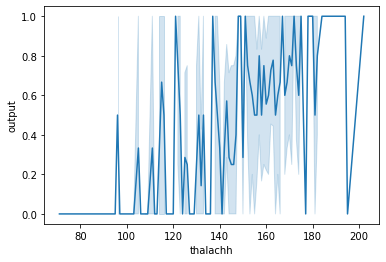

In [14]:
# Study the correlation between max heart rate when having a heart disease

sns.lineplot(x = heart_file["thalachh"], y = heart_file["output"])


<AxesSubplot:xlabel='oldpeak', ylabel='output'>

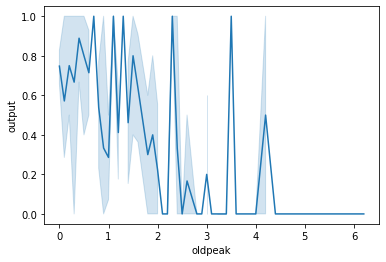

In [20]:
# Study the correlation between old peak reached and the output
sns.lineplot(x = heart_file["oldpeak"], y = heart_file["output"])

<AxesSubplot:title={'center':'number of blood vessels'}, ylabel='output'>

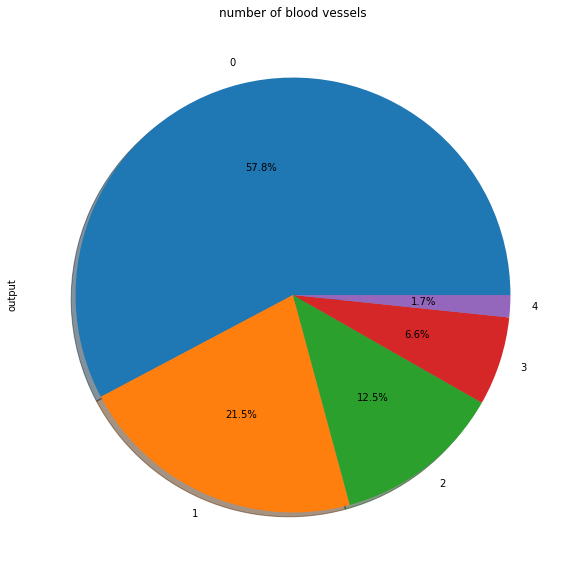

In [24]:
# Study the correlation between number of blood vessels when having a heart disease

heart_file.groupby('caa')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="number of blood vessels")

<AxesSubplot:title={'center':'fasting blood sugar'}, ylabel='output'>

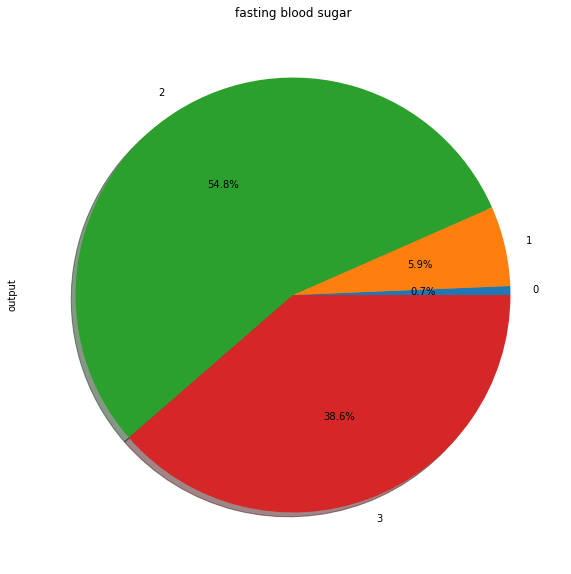

In [25]:
# Study the correlation between thall when having a heart disease
heart_file.groupby('thall')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="fasting blood sugar")

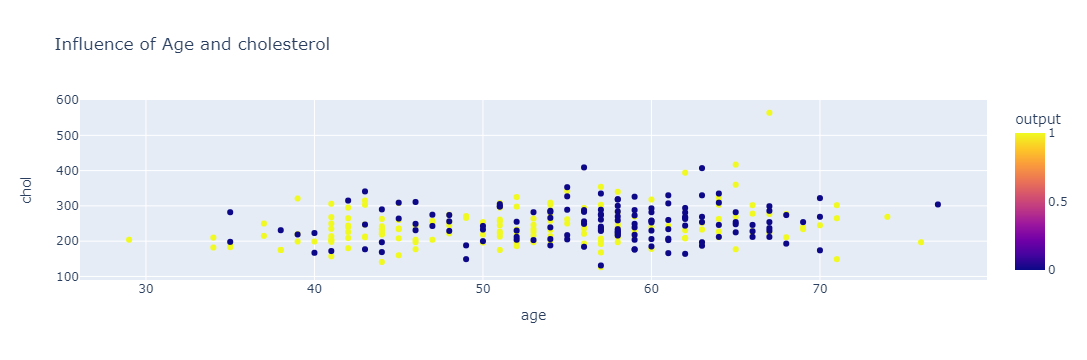

In [17]:
# interactive graph between Age and cholesterol in mg/dl
px.scatter(heart_file,x="age",y="chol",color="output",title="Influence of Age and cholesterol")

# This is 2 variable graph showing effect on the target variable

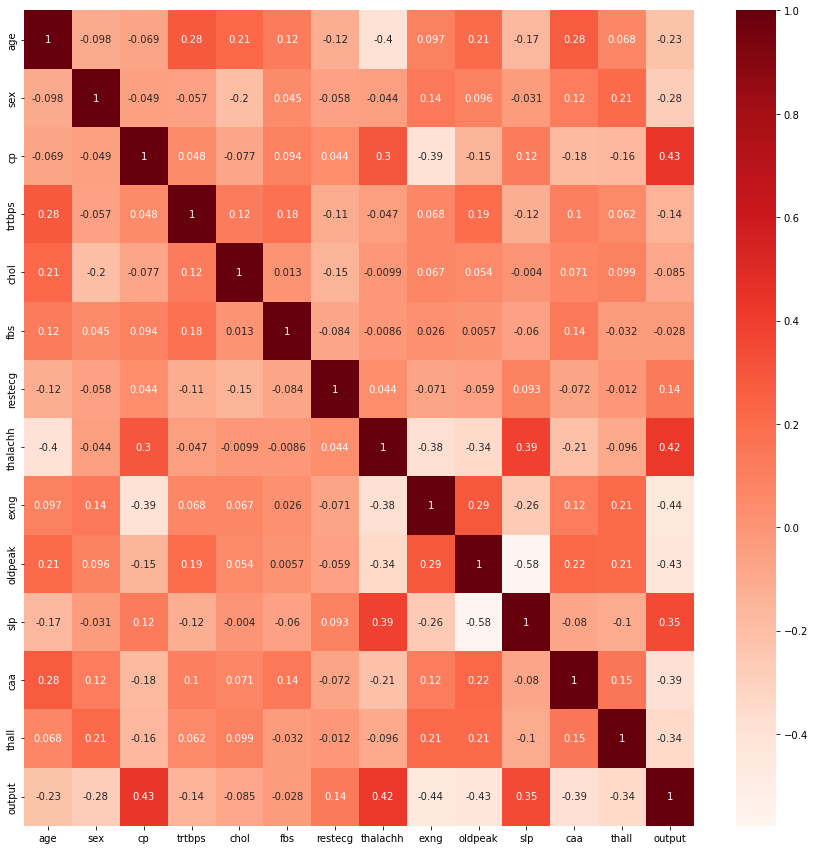

In [78]:
# Correlation map

plt.figure(figsize=(15,15))
cor = heart_file.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [79]:
# Handling the duplicates

heart_file[heart_file.duplicated()]
heart_file.drop_duplicates(keep='first',inplace=True)
heart_file.shape

(302, 14)

In [13]:
# DEVELOPING PREDICTIVE MODELS 
# Since our target variable is categorical, we are using Logistic Regression Model, SVM and Decision Tree model 

# import warnings filter
from warnings import simplefilter
#ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [11]:
M= heart_file.groupby('output').size()
print(M)

output
0    138
1    165
dtype: int64


In [14]:
# SPLIT DATA INTO TRAIN AND TEST DATA 

# Divide datasets into two, one with target variable one without

x = heart_file.drop(['output'], axis = 1)
y = heart_file['output']

# Dividing the data into training and testing data set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y, random_state=2)

print(x.shape,  x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


In [ ]:
## lOGISTIC REGRESSION

In [44]:
# Run a logistic model on training data

model1 = LogisticRegression(max_iter=1000)
model1.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [45]:
# Predict using the logistic model on training data

x_train_prediction = model1.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

# Check the accuracy 
print('Training_data_accuracy : ',training_data_accuracy)

Training_data_accuracy :  0.8553719008264463


In [46]:
# Predict using logistic regression on test data

x_test_prediction = model1.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

print('Test_data_accuracy : ', test_data_accuracy)

Test_data_accuracy :  0.8032786885245902


In [47]:
print(x_test_prediction)

[0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1]


In [48]:
# performance on validation set
confusion_matrix(y_test,x_test_prediction)

array([[22,  6],
       [ 6, 27]], dtype=int64)

[[22  6]
 [ 6 27]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

--------------------------------------------------------


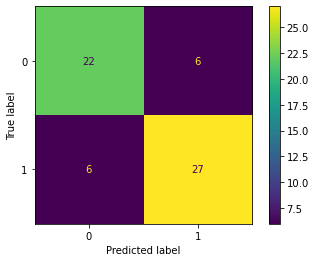

In [49]:
# plot confusion matrix
from sklearn.metrics import *
log_f1 = f1_score(y_test, x_test_prediction)
log_acc = accuracy_score(y_test, x_test_prediction)
log_recall = recall_score(y_test, x_test_prediction)
log_auc = roc_auc_score(y_test,x_test_prediction)

print(confusion_matrix(y_test, x_test_prediction))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test,x_test_prediction))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(model1, x_test, y_test)

In [ ]:
## K NEAREST NEIGHBORS

In [35]:
# KNN CLASSIFICASTIONS

from sklearn.neighbors import  KNeighborsClassifier

from sklearn.metrics import accuracy_score,r2_score

for i in range(1,10):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    pred1 = knn1.predict(x_test)
    print(f"For Knn-{i}: \n")
    print(classification_report(y_test,pred1))
    print(accuracy_score(y_test,pred1))
    print('====================================')

For Knn-1: 

              precision    recall  f1-score   support

           0       0.52      0.57      0.54        28
           1       0.60      0.55      0.57        33

    accuracy                           0.56        61
   macro avg       0.56      0.56      0.56        61
weighted avg       0.56      0.56      0.56        61

0.5573770491803278
For Knn-2: 

              precision    recall  f1-score   support

           0       0.48      0.71      0.57        28
           1       0.58      0.33      0.42        33

    accuracy                           0.51        61
   macro avg       0.53      0.52      0.50        61
weighted avg       0.53      0.51      0.49        61

0.5081967213114754
For Knn-3: 

              precision    recall  f1-score   support

           0       0.59      0.61      0.60        28
           1       0.66      0.64      0.65        33

    accuracy                           0.62        61
   macro avg       0.62      0.62      0.62        

In [37]:
# the best iteration we get is at n_neighbors = 9, with highest accuracy, precision and recall

KNN = KNeighborsClassifier(n_neighbors= 9)
KNN.fit(x_train,y_train)
pred = KNN.predict(x_test)
print(f"For Knn-{i}: \n")
print(classification_report(y_test,pred))

For Knn-9: 

              precision    recall  f1-score   support

           0       0.61      0.50      0.55        28
           1       0.63      0.73      0.68        33

    accuracy                           0.62        61
   macro avg       0.62      0.61      0.61        61
weighted avg       0.62      0.62      0.62        61



In [38]:
confusion_matrix(y_test, pred)

array([[14, 14],
       [ 9, 24]], dtype=int64)

In [39]:
accuracy_score(y_test,pred)*100

62.295081967213115

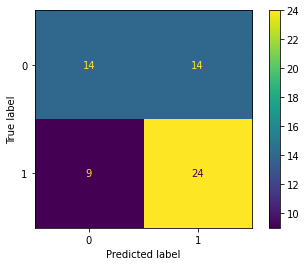

In [50]:
plot_confusion_matrix(KNN, x_test, y_test)

In [ ]:
## DECISION TREE

In [6]:
# assigning independent & dependent variable (heart)
independent_variables = ["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", 
                         "thalachh", "exng", "oldpeak", "slp", "caa", "thall"]

X = heart_file[independent_variables] # independent
y = heart_file.output # dependent

# 70% training set & 30% test set splited
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier() # decision tree classifer object clf
clf = clf.fit(X_train,y_train) # train
y_pred = clf.predict(X_test) # predict

# check model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


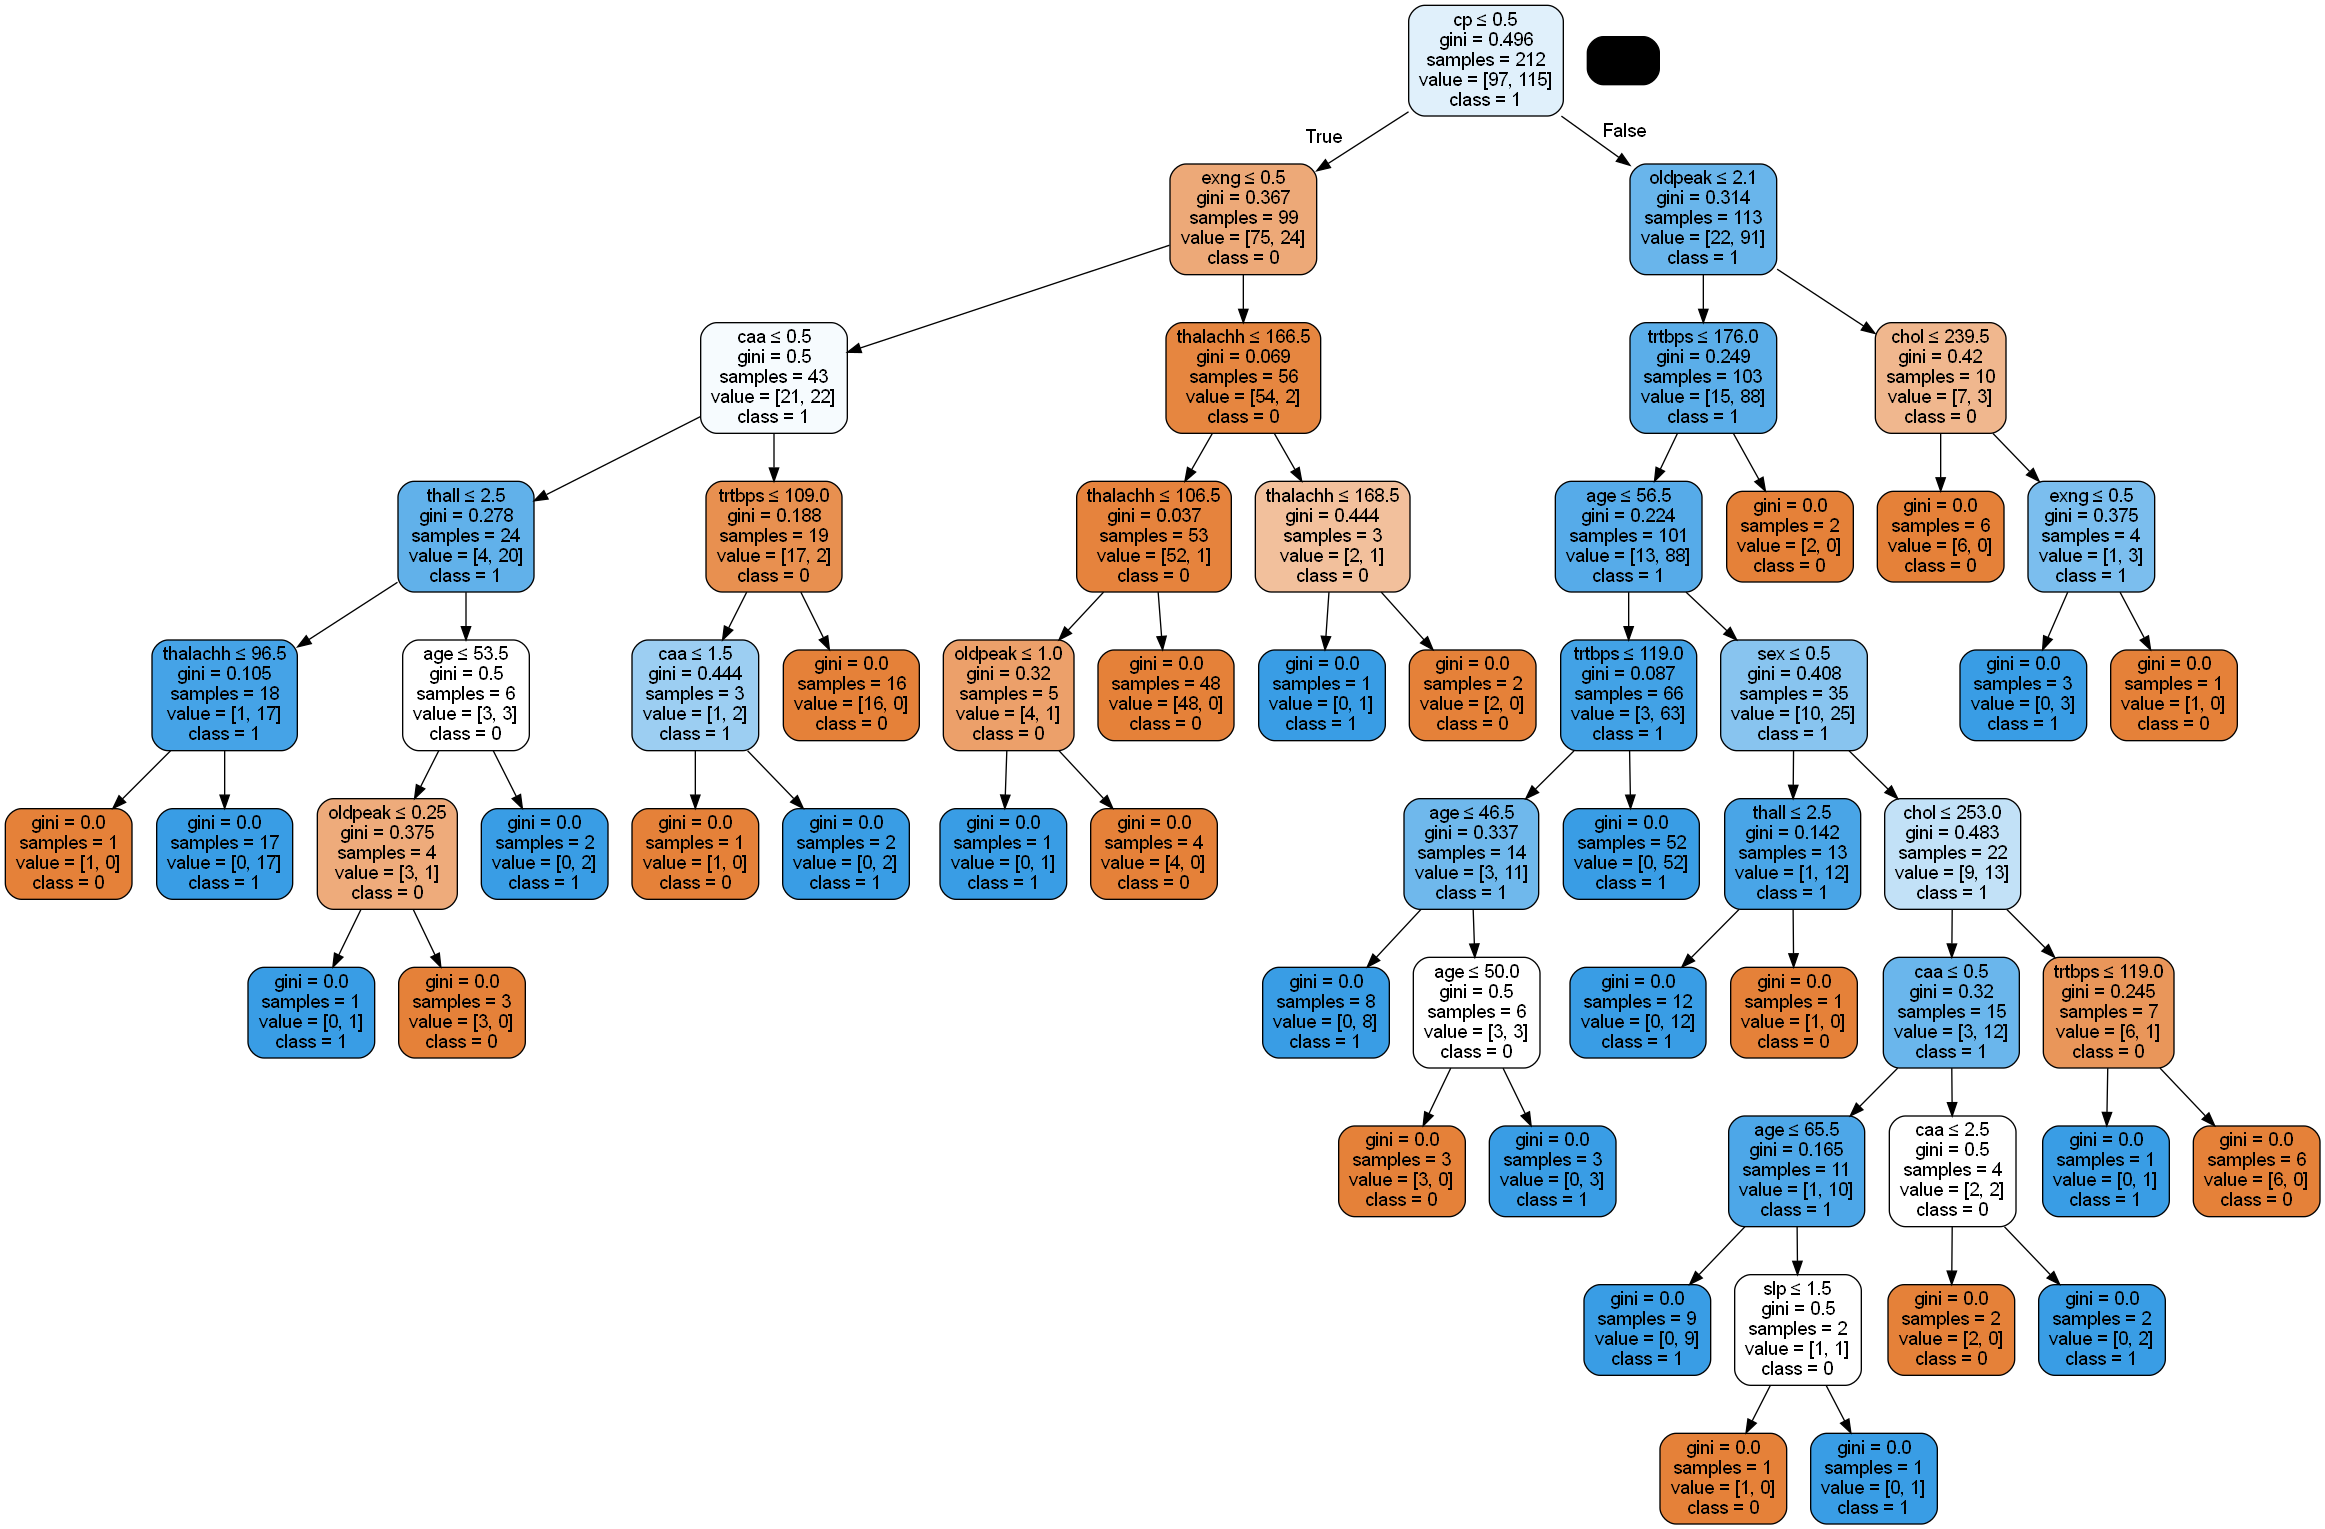

In [7]:
# print the decision tree
# need to install graphviz and pydotplus
# use the code "conda install graphviz" if graphviz's executables not found
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = independent_variables,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart_attack.png')
Image(graph.create_png())

In [5]:
# trying to optimize the decison tree
clf2 = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=3)
clf2 = clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# It improves slightly

Accuracy: 0.7362637362637363


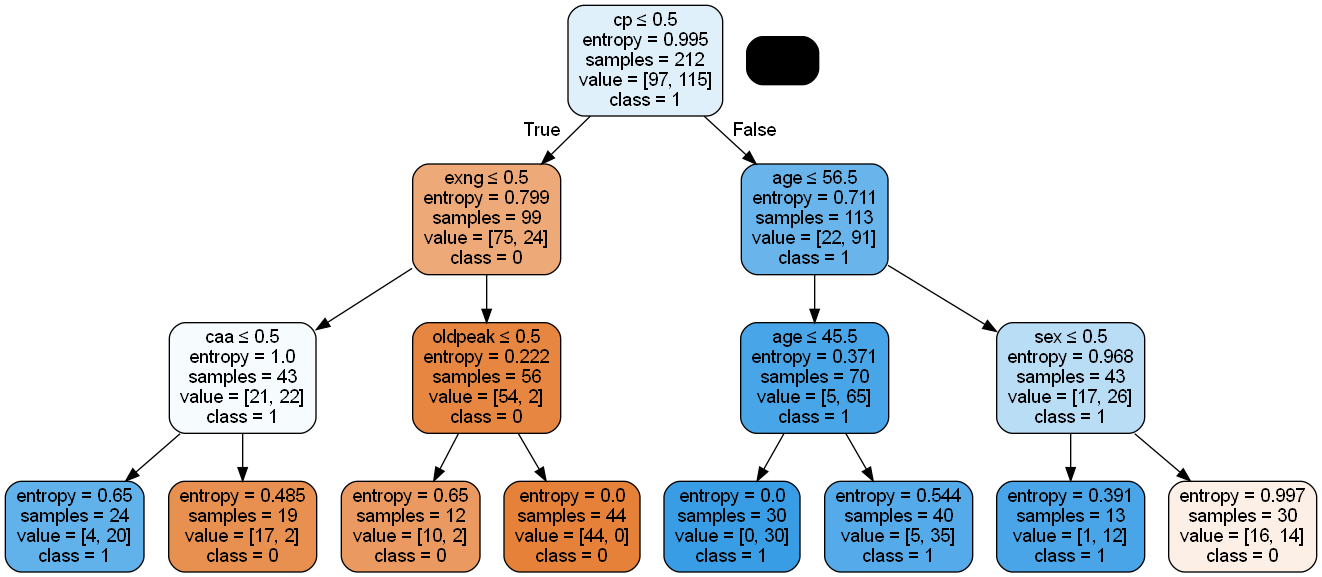

In [8]:
# re print decision tree
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = independent_variables,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart_attack.png')
Image(graph.create_png())

In [ ]:
# SUPPORT VECTOR MACHINE

In [90]:
# SVM Model

# Split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 42)

# Split the data into train and validation set
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

print("X_train shape: {}".format(x_train.shape))

print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(x_test.shape))

print("y_test shape: {}".format(y_test.shape))

print("X_validation shape: {}".format(x_validation.shape))

print("y_validation shape: {}".format(y_validation.shape))

X_train shape: (86, 13)
y_train shape: (86,)
X_test shape: (36, 13)
y_test shape: (36,)
X_validation shape: (22, 13)
y_validation shape: (22,)


In [91]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_validation = sc.transform(x_validation)

In [93]:
# Train the model on train dataset

from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)

classifier.score(x_train, y_train) 

0.9767441860465116

In [94]:
# Predicting the validation set

y_pred_val = classifier.predict(x_validation)
accuracy_score(y_validation, y_pred_val)

0.8636363636363636

In [95]:
# Predicting on test data set
y_pred = classifier.predict(x_test)

print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8333333333333334


In [96]:
# Produce the confusion matrix

z = confusion_matrix(y_test, y_pred)
print(z)
accuracy_score(y_test, y_pred)

[[13  3]
 [ 3 17]]


0.8333333333333334

In [ ]:
# Since SVM model gives us the maximum accuracy on testing data set, we choose SVM as our final model

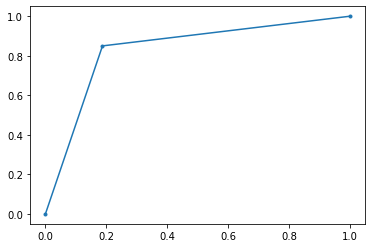

In [97]:
# plot the ROC curve
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='SVM' % auc_keras)

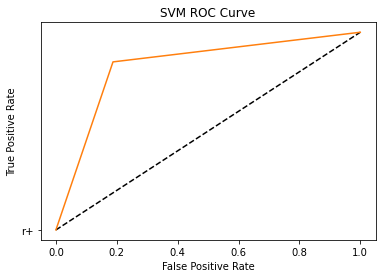

In [98]:
# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='SVM')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.show()